In [1]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt

import scheduler_mda_class as sch_mda
import room_class as room_class

In [2]:
data_path = os.path.join(os.path.dirname(os.getcwd()), "data", "class_mays2.csv")
df = pd.read_csv(data_path)
case_path = os.path.join(os.path.dirname(os.getcwd()), "data", "gantt_class.csv")
session_path = os.path.join(os.path.dirname(os.getcwd()), "data", "sessions_mda.csv")
options = {"seconds": 500}

In [3]:
classer = room_class.RoomClassifier(data_path)

In [4]:
case_prob = classer.solve(case_path)

In [5]:
case_or = np.where(case_prob>0.212)
case_set = set()
for i in range(len(case_or[0])):
    case_set.add((case_or[0][i],case_or[1][i]+1))
case_set_no = set()
for i in range(1,7):
    for j in range(23):
        if (j,i) not in case_set: case_set_no.add((j,i))

In [6]:
case_set

{(0, 1),
 (1, 5),
 (2, 4),
 (3, 1),
 (3, 6),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 4),
 (8, 4),
 (9, 1),
 (10, 4),
 (11, 1),
 (12, 4),
 (13, 3),
 (13, 4),
 (14, 4),
 (15, 3),
 (15, 4),
 (16, 4),
 (17, 4),
 (18, 2),
 (19, 2),
 (20, 3),
 (20, 4),
 (21, 2),
 (22, 2)}

In [7]:
scheduler = sch_mda.TheatreScheduler(case_file_path=case_path, session_file_path=session_path, case_no=case_set_no)

Welcome to the CBC MILP Solver 
Version: 2.10.8 
Build Date: May  5 2022 

command line - C:\Program Files\Cbc-releases.2.10.8-w64-msvc16-md\bin\cbc.exe -seconds 500 -printingOptions all -import C:\Users\lliu10\AppData\Local\Temp\tmpl4xp66c3.pyomo.lp -mipstart C:\Users\lliu10\AppData\Local\Temp\tmpx3sv059e.cbc.soln -stat=1 -solve -solu C:\Users\lliu10\AppData\Local\Temp\tmpl4xp66c3.pyomo.soln (default strategy 1)
seconds was changed from 1e+100 to 500
Option for printingOptions changed from normal to all
 CoinLpIO::readLp(): Maximization problem reformulated as minimization
Coin0009I Switching back to maximization to get correct duals etc
opening mipstart file .\C:\Users\lliu10\AppData\Local\Temp\tmpx3sv059e.cbc.soln.
Presolve 232 (-7154) rows, 141 (-4678) columns and 986 (-42521) elements
Statistics for presolved model
Original problem has 4674 integers (4674 of which binary)
Presolved problem has 114 integers (114 of which binary)
==== 114 zero objective 2 different
114 variables hav

Cbc0014I Cut generator 4 (MixedIntegerRounding2) - 1 row cuts average 9.0 elements, 0 column cuts (0 active)  in 0.042 seconds - new frequency is -100
Cbc0014I Cut generator 5 (FlowCover) - 0 row cuts average 0.0 elements, 0 column cuts (0 active)  in 0.063 seconds - new frequency is -100
Cbc0014I Cut generator 6 (TwoMirCuts) - 168 row cuts average 14.1 elements, 0 column cuts (0 active)  in 0.020 seconds - new frequency is -100
Cbc0010I After 0 nodes, 1 on tree, -17 best solution, best possible -23 (0.57 seconds)
Cbc0038I Full problem 232 rows 141 columns, reduced to 28 rows 21 columns
Cbc0038I Full problem 232 rows 141 columns, reduced to 34 rows 22 columns
Cbc0038I Full problem 232 rows 141 columns, reduced to 59 rows 36 columns
Cbc0038I Full problem 232 rows 141 columns, reduced to 37 rows 25 columns
Cbc0038I Full problem 232 rows 141 columns, reduced to 39 rows 32 columns
Cbc0016I Integer solution of -18 found by strong branching after 8252 iterations and 662 nodes (2.33 seconds)


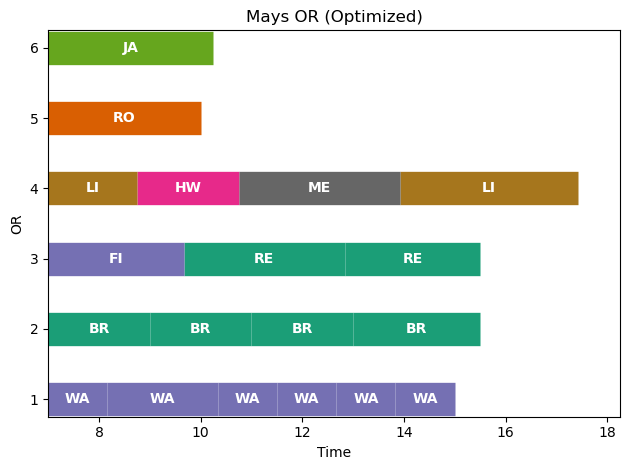

In [8]:
cbc_path = "C:\\Program Files\\Cbc-releases.2.10.8-w64-msvc16-md\\bin\\cbc.exe"
scheduler.solve(solver_name="cbc", solver_path=cbc_path, options=options)